### Notebook to customize jpg figures for outputs

In [1]:
%matplotlib inline 
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [21]:
from scipy.stats import mode

In [22]:
import pandas as pd

In [2]:
def result_loader(basedir, basename=None, nfiles=10):
    """ File: fig_clustering_low-m2_02_global_2000_2018_band28_29_31_gray_n-0_N-20.jpg
    """
    imgs_list = []
    for i in range(nfiles):
        file = (os.path.join(basedir,
            "fig_clustering_low-{}_gray_n-{}_N-20.jpg".format(
                    basename, i
                )
            )
        )
        
        img = Image.open(file)
        imgs_list.append(img)
    return imgs_list

In [3]:
def log_loader(basedir,basename=None, nfiles=10):
    data_list = []
    for i in range(nfiles):
        file = (os.path.join(basedir,
            "fig_clustering_low-{}_gray_n-{}_N-20.txt".format(
                    basename, i
                )
            )
        )
        
        with open(file, 'r') as f:
            lines = f.read()
            data = []
            for line in lines.split('\n'):
                #print(line)
                j = line.replace(' ', '')
                if len(j) > 0:
                    data.append(float(j))
        data_list.append(np.array(data))
    return data_list

#### Load imgs and log file for cluster 5 and 13

- Cluster 5

In [35]:
basedir = './results/cluster-5'
basename = 'm2_02_global_2000_2018_band28_29_31'
imgs_cluster5_list = result_loader(basedir, basename=basename, nfiles=10)

In [36]:
basedir = './logs/cluster-5'
basename = 'm2_02_global_2000_2018_band28_29_31'
logs_cluster5_list = log_loader(basedir, basename=basename, nfiles=10)

- Cluster 13

In [37]:
basedir = './results/cluster-13'
basename = 'm2_02_global_2000_2018_band28_29_31'
imgs_cluster13_list = result_loader(basedir, basename=basename, nfiles=10)

In [38]:
basedir = './logs/cluster-13'
basename = 'm2_02_global_2000_2018_band28_29_31'
logs_cluster13_list = log_loader(basedir, basename=basename, nfiles=10)

---------------

In [6]:
def crop_center(pil_img, crop_width, crop_height):
    img_width, img_height = pil_img.size
    return pil_img.crop(((img_width - crop_width) // 2,
                         (img_height - crop_height) // 2,
                         (img_width + crop_width) // 2,
                         (img_height + crop_height) // 2))

In [7]:
def crop_max_square(pil_img):
    return crop_center(pil_img, min(pil_img.size), min(pil_img.size))

Extract data

In [8]:
img_obj= imgs_cluster5_list[0]

In [9]:
img_obj.size

(778, 583)

In [10]:
cimg_obj = crop_center(img_obj, 600,400)

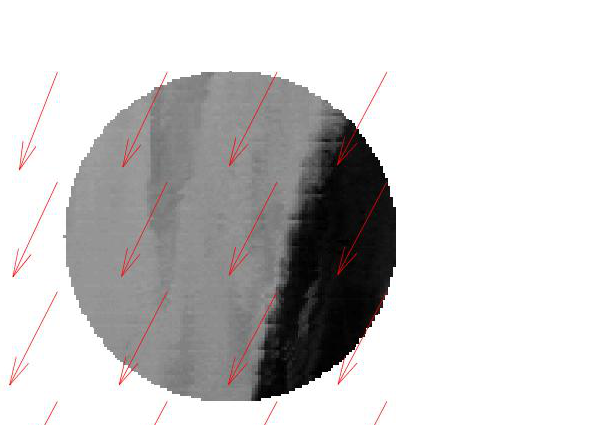

In [11]:
img_obj.crop((180, 25, 770, 450))

###### Process crop and ndarray-nize

In [12]:
def img_preprocess(imgs_list, lurl=(180, 25, 770, 550) ):
    preprocess_list = []
    for img in imgs_list:
        preprocess_list.append(np.asarray(img.crop(lurl)))
    return preprocess_list

In [13]:
pimgs_cluster5_list = img_preprocess(imgs_cluster5_list)

In [39]:
pimgs_cluster13_list = img_preprocess(imgs_cluster13_list)

#### Visualize as (2,5) column images

In [49]:
def base_plot(imgs_list, size=(4,3),dpi=100, nrow=2, ncol=5):
    fig,ax  = plt.subplots(ncol, nrow,figsize=size,dpi=dpi)
    plt.subplots_adjust(wspace=0.01, hspace=0.01)
    icol=0
    ii = 0
    for idx,i in enumerate(range(len(imgs_list))) :
        #ax = plt.subplot(ncol, nrow,idx+1)
        ax[ii][icol].imshow(imgs_list[i])
        ax[ii][icol].set_xticklabels([])
        ax[ii][icol].set_yticklabels([])
        ax[ii][icol].axis('off')
        ii+=1
        if idx == len(imgs_list)/2-1:
            icol+=1
            ii=0
    fig.tight_layout()
    plt.show()
    plt.close()

In [75]:
def base_titleplot(imgs_list, angles,size=(4,3),dpi=100, nrow=2, ncol=5,fsize=14):
    fig,ax  = plt.subplots(ncol, nrow,figsize=size,dpi=dpi)
    plt.subplots_adjust(wspace=0.0, hspace=0.0)
    icol=0
    ii = 0
    for idx,i in enumerate(range(len(imgs_list))) :
        #ax = plt.subplot(ncol, nrow,idx+1)
        ax[ii][icol].imshow(imgs_list[i])
        ax[ii][icol].set_xticklabels([])
        ax[ii][icol].set_yticklabels([])
        ax[ii][icol].axis('off')
        ax[ii][icol].set_title(angles[icol*2+ii],fontsize=fsize)
        ii+=1
        if idx == len(imgs_list)/2-1:
            icol+=1
            ii=0
    fig.tight_layout()
    plt.show()
    plt.close()

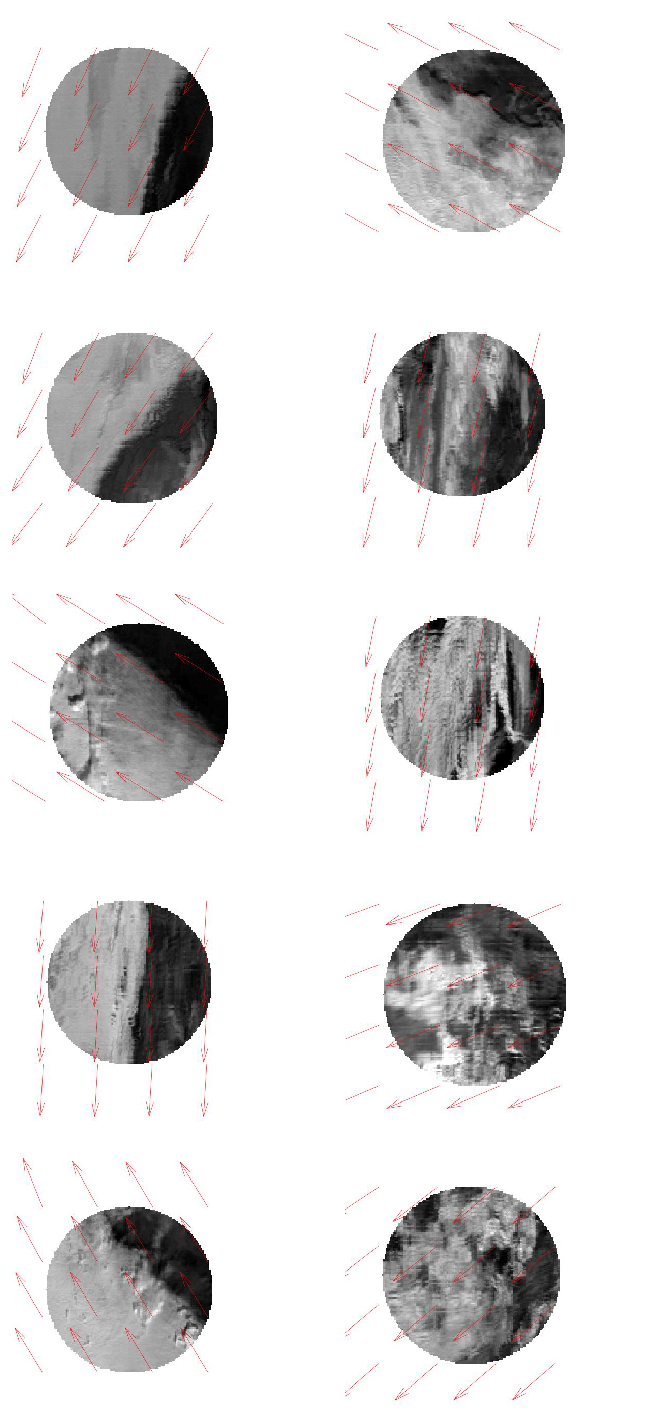

In [50]:
base_plot(pimgs_cluster5_list, size=(6,12), dpi=120)

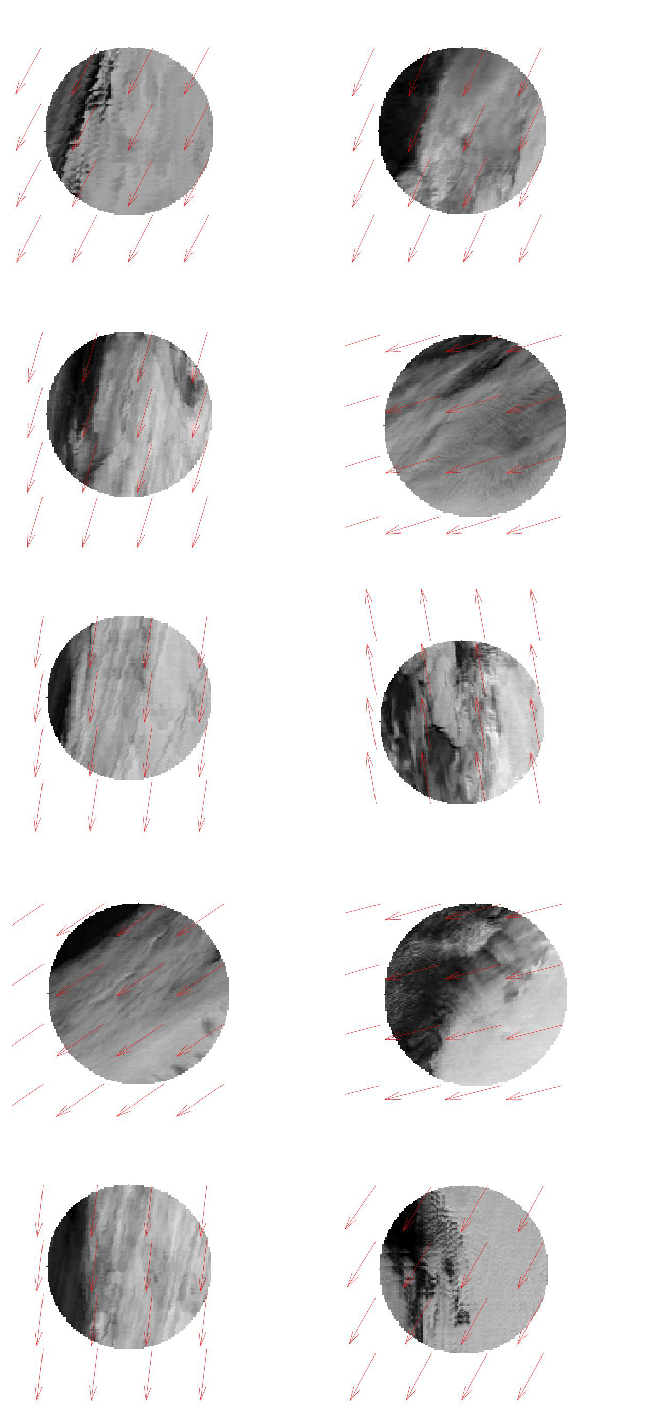

In [51]:
base_plot(pimgs_cluster13_list, size=(6,12), dpi=120)

#### Compute mod, mean and median of angles in log file

In [29]:
def compute_stats(logs):
    array = np.zeros((len(logs),3)).astype(np.float64)
    label_list = ['mean', 'median', 'mode']
    for idx, data in enumerate(logs):
        m = np.mean(data)
        half = np.median(data)
        md = mode(data)
        array[idx,0] = m
        array[idx,1] = half
        array[idx,2] = md[0]
    df = pd.DataFrame(array)
    df.columns = label_list
    return df

In [30]:
df_cluster5 = compute_stats(logs_cluster5_list)

In [31]:
df_cluster5

mean   median    mode
0   26.799375   27.430   25.09
1   33.655625   35.335   27.83
2  121.973750  121.600  121.60
3    3.606250    3.490    3.35
4  149.750625  148.925  148.33
5  118.141875  118.425  117.59
6   13.695000   13.790   13.82
7   10.008750    9.860    9.68
8   67.638750   67.290   66.83
9   50.402500   49.705   49.01

In [41]:
df_cluster13 = compute_stats(logs_cluster13_list)

In [42]:
df_cluster13

mean   median    mode
0   27.888750   27.785   27.70
1   16.635000   16.720   16.35
2    8.540000    8.515    8.45
3   55.762500   55.730   55.71
4    6.778125    6.800    6.80
5   24.785000   24.890   24.04
6   72.555000   72.565   72.57
7  169.910625  169.990  170.01
8   75.291250   75.590   73.91
9   29.977500   29.330   28.61

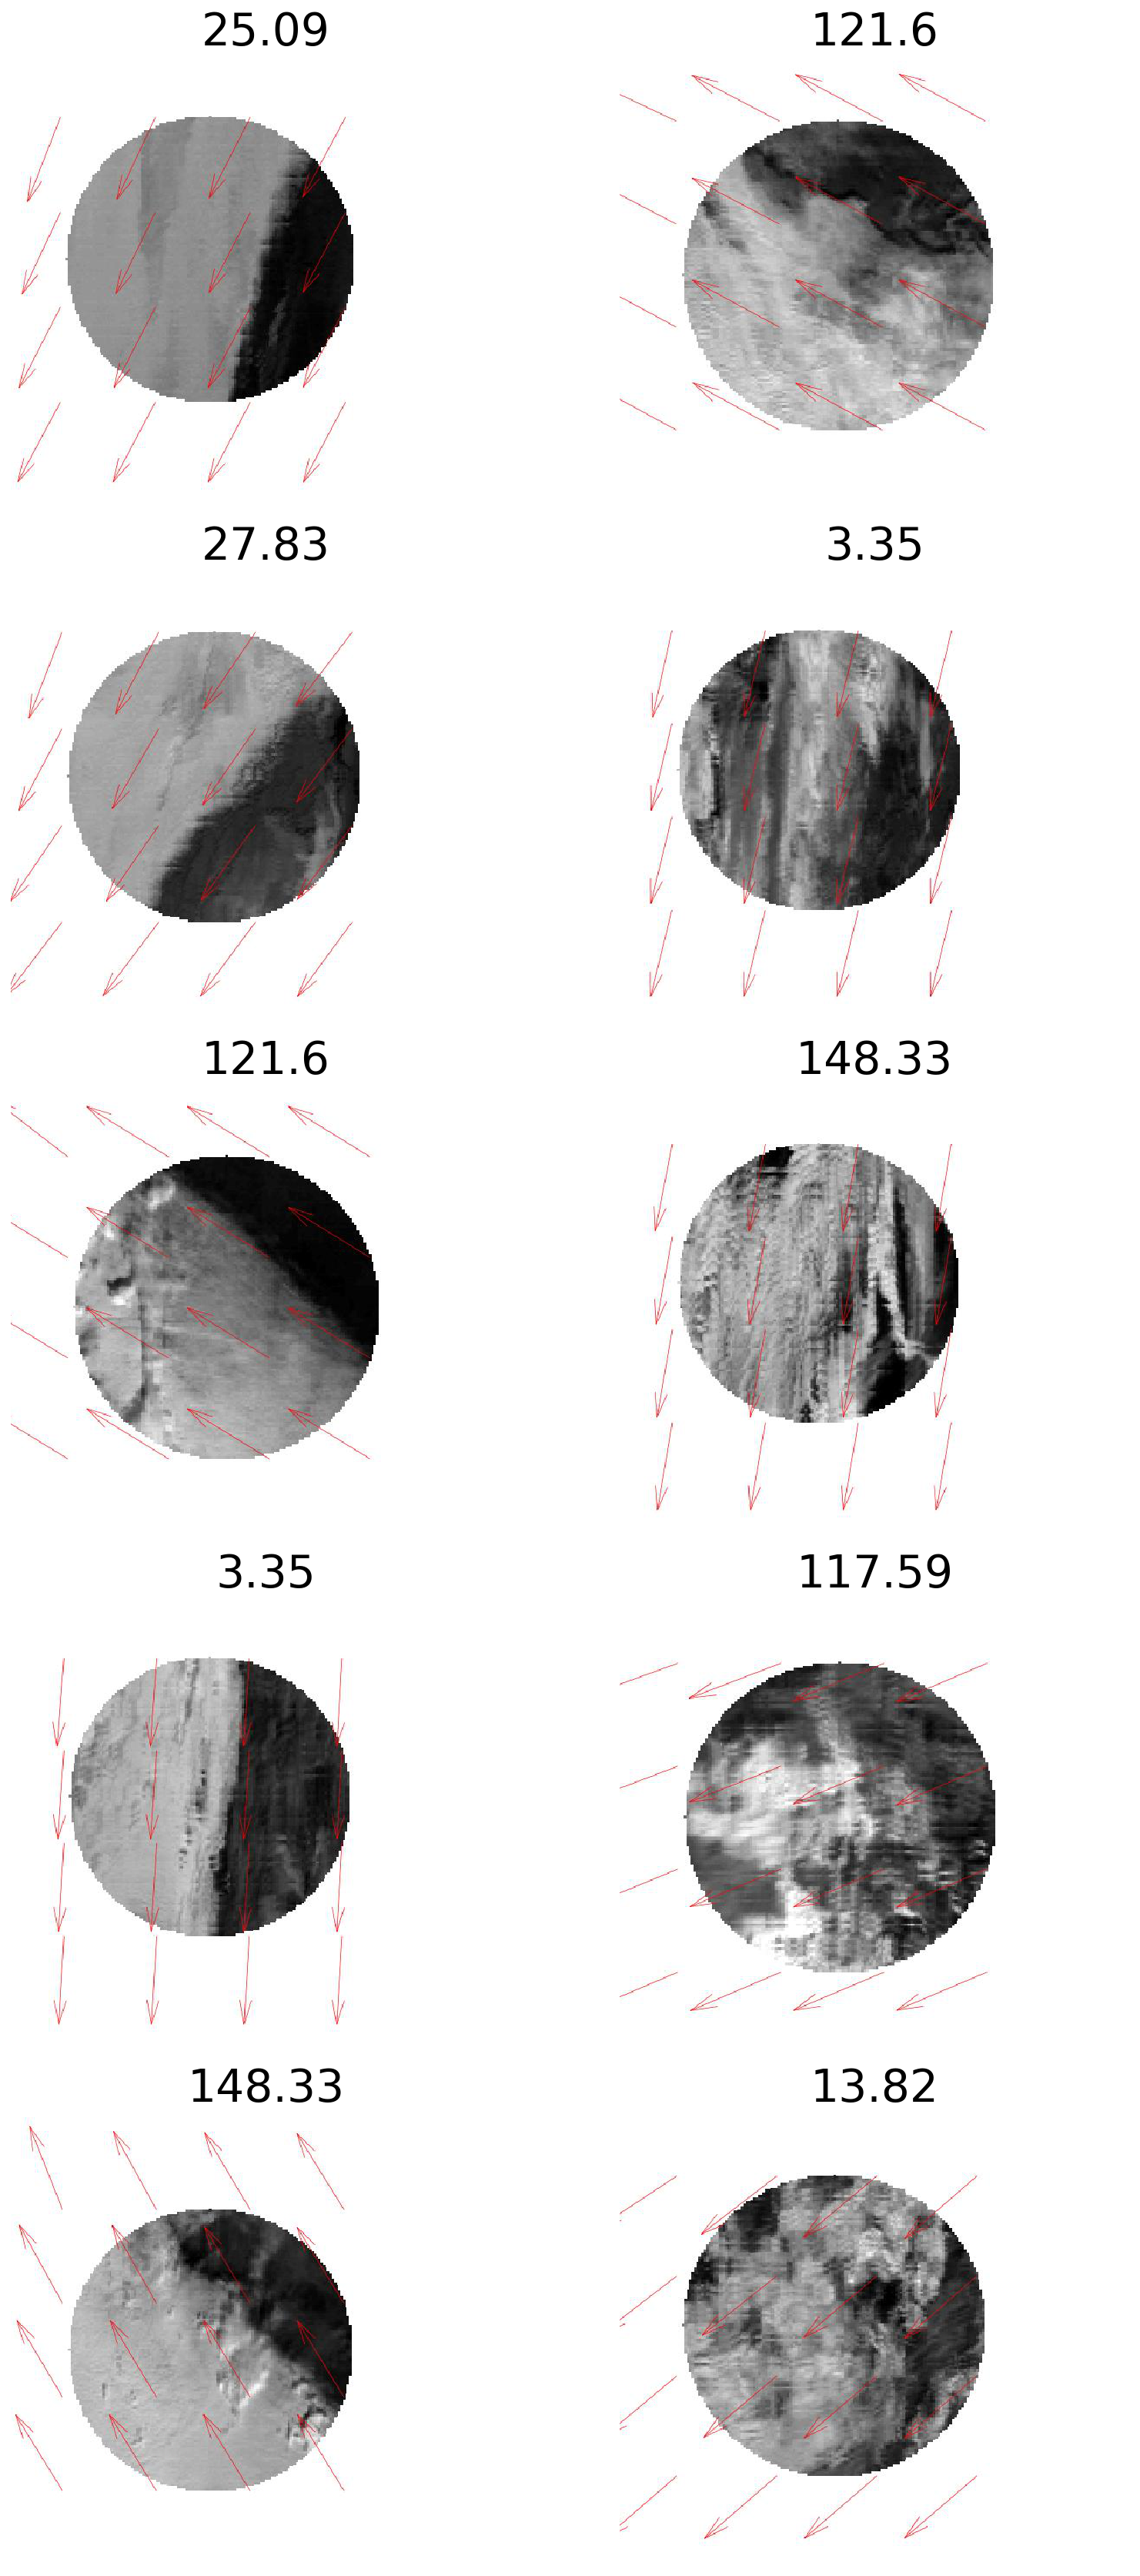

In [73]:
base_titleplot(pimgs_cluster5_list, df_cluster5['mode'] ,size=(12,24), dpi=140, fsize=30)

In [ ]:
base_titleplot(pimgs_cluster5_list, df_cluster5['mode'] ,size=(4,10), dpi=100, fsize=15)

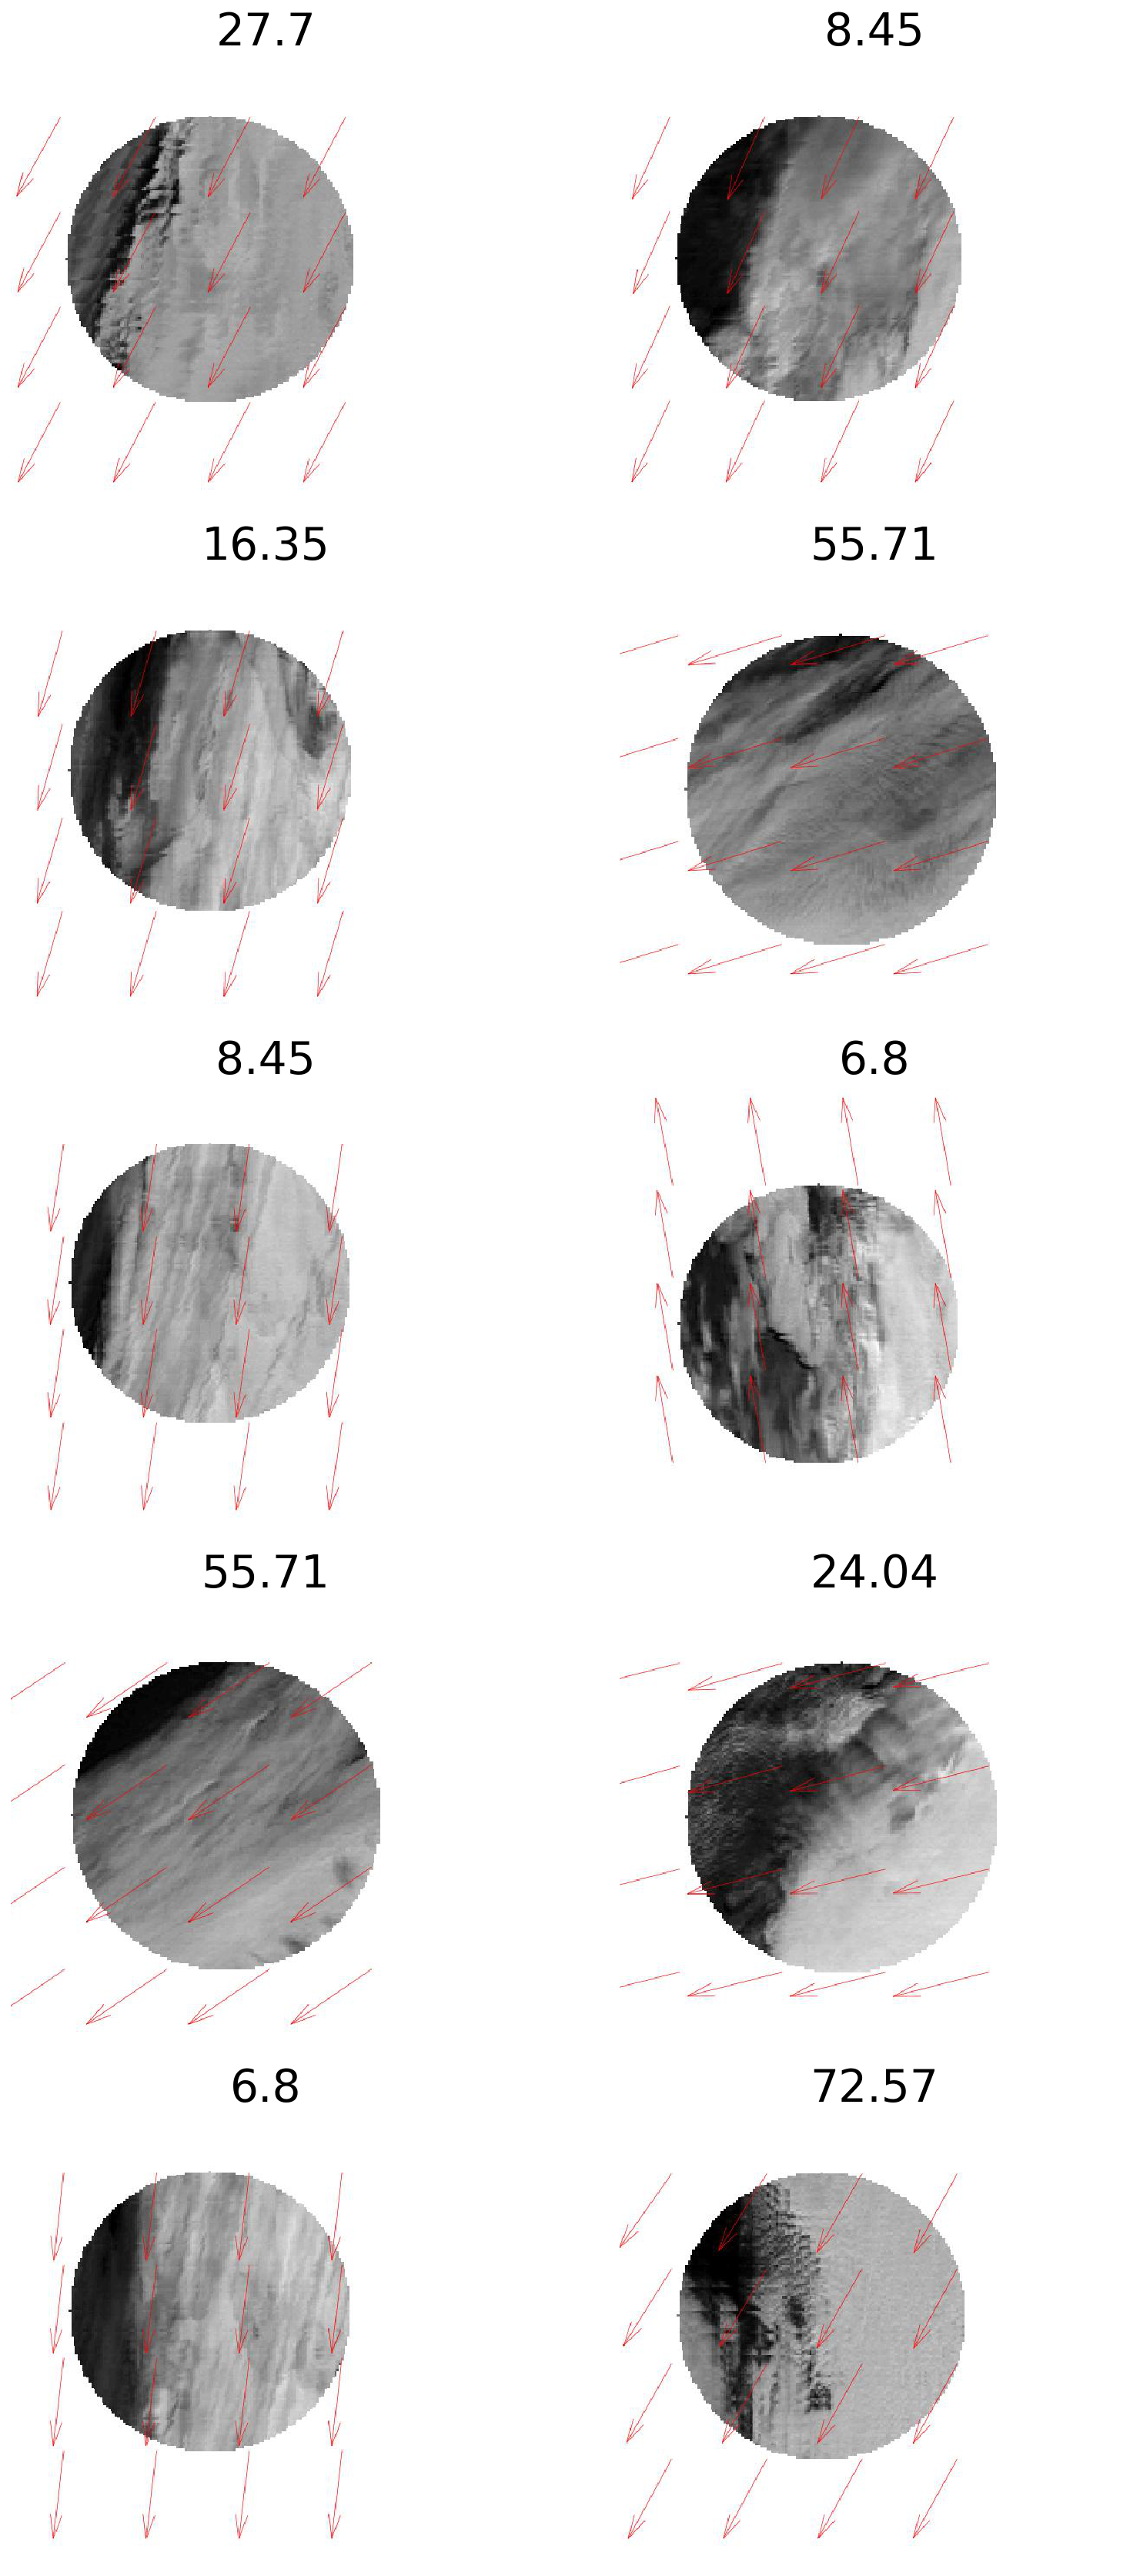

In [74]:
base_titleplot(pimgs_cluster13_list, df_cluster13['mode'] ,size=(12,24), dpi=140, fsize=30)